In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,roc_auc_score,plot_roc_curve

In [2]:
data = pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'fbs'}>]], dtype=object)

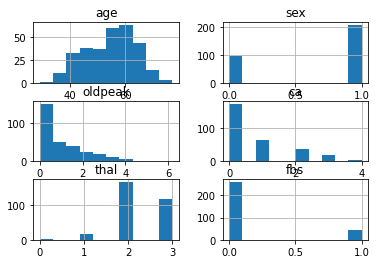

In [4]:
data[["age","sex","oldpeak","ca","thal","fbs"]].hist()

In [5]:
data = data.sample(frac=1)
X = data.drop("target",axis=1)
y = data["target"]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1


In [8]:
y_train

129    1
72     1
2      1
238    0
131    1
      ..
7      1
25     1
43     1
170    0
40     1
Name: target, Length: 242, dtype: int64

In [9]:
def eve(y_true,y_pred):
    conf_mat = confusion_matrix(y_true,y_pred)
    sns.heatmap(conf_mat)
    print("Accuracy  : ",accuracy_score(y_true,y_pred),"%")
    print("Precision : ",precision_score(y_true,y_pred),"%")
    print("Recall    : ",recall_score(y_true,y_pred),"%")
    print("F1 Score  : ",f1_score(y_true,y_pred),"%")

## first trying LogisticRegression

In [10]:
np.random.seed(42)
model1 = LogisticRegression(max_iter=100000)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

Accuracy  :  0.8688524590163934 %
Precision :  0.8529411764705882 %
Recall    :  0.90625 %
F1 Score  :  0.8787878787878787 %


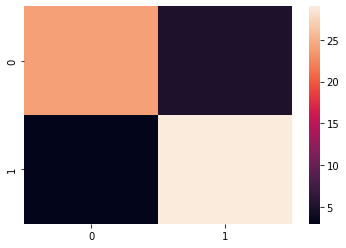

In [11]:
y_pred = model1.predict(X_test)
eve(y_test,y_pred)

## TRYING KNEIGHBORS CLASSIFIER

In [12]:
np.random.seed(42)
model2 = KNeighborsClassifier(n_jobs=-1)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

Accuracy  :  0.6229508196721312 %
Precision :  0.6097560975609756 %
Recall    :  0.78125 %
F1 Score  :  0.684931506849315 %


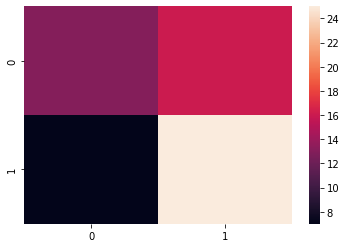

In [13]:
y_k_pred = model2.predict(X_test)
eve(y_test,y_k_pred)


## TRYING RANDOMFORESTCLASSIFIER

In [14]:
model3 = RandomForestClassifier(n_jobs=-1)
model3.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

Accuracy  :  0.9180327868852459 %
Precision :  0.9655172413793104 %
Recall    :  0.875 %
F1 Score  :  0.9180327868852458 %


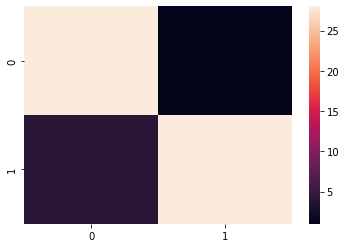

In [15]:
y_r_pred = model3.predict(X_test)
eve(y_test,y_r_pred)

## GOOD BYE KNC XD

## HYPER PARAMETER TUNING

### HYPER PARAMETER TUNING FOR KNN

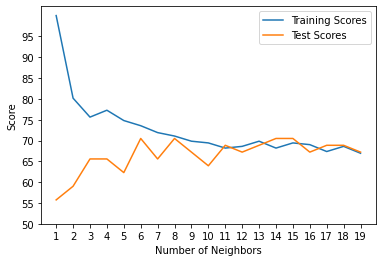

In [16]:
neighbors = range(1,20)
train_scores=[]
test_scores=[]
knn = KNeighborsClassifier()
for x in neighbors:
    knn.set_params(n_neighbors=x)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train)*100)
    test_scores.append(knn.score(X_test,y_test)*100)
plt.plot(neighbors,train_scores,label="Training Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,20,1))
plt.yticks(np.arange(50,100,5))
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()

## HYPER PARAMETER TUNING WITH RANDOMIZEDSEARCHCV

On LogisticRegression

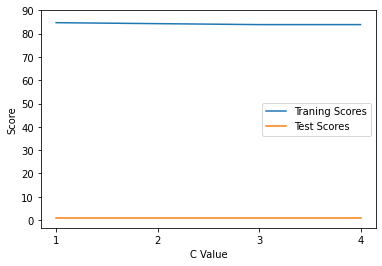

In [17]:
train_score = []
test_score = []

rfc = LogisticRegression(max_iter=10000)
C_var = range(1,5)
for x in C_var:
    rfc.set_params(C=x)
    rfc.fit(X_train,y_train)
    train_score.append(rfc.score(X_train,y_train)*100)
    test_score.append(rfc.score(X_test,y_test))
    
plt.plot(C_var,train_score,label="Traning Scores")
plt.plot(C_var,test_score,label="Test Scores")
plt.xticks(np.arange(1,5))
plt.yticks(np.arange(0,100,10))
plt.xlabel("C Value")
plt.ylabel("Score")
plt.legend()

In [18]:
rfc.score(X_test,y_test) * 100

86.88524590163934

## Evaluating our tuned machine learning classifier

In [19]:
def eve(y_true,y_pred,rfc):
    print("Accuracy  : ",accuracy_score(y_true,y_pred),"%")
    print("Precision : ",precision_score(y_true,y_pred),"%")
    print("Recall    : ",recall_score(y_true,y_pred),"%")
    print("F1 Score  : ",f1_score(y_true,y_pred),"%")
    conf_mat = confusion_matrix(y_true,y_pred)
    sns.heatmap(conf_mat)
    print("ROC_AUC_Score : ",roc_auc_score(y_true,y_pred))
    print()
    print("******************Classification Report*****************")
    print(classification_report(y_true,y_pred))
    plot_roc_curve(rfc,X_test,y_test)

Accuracy  :  0.8688524590163934 %
Precision :  0.8529411764705882 %
Recall    :  0.90625 %
F1 Score  :  0.8787878787878787 %
ROC_AUC_Score :  0.8669181034482758

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


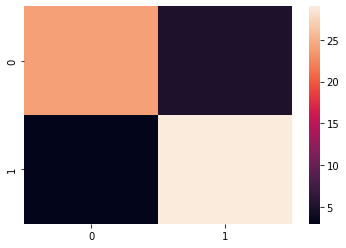

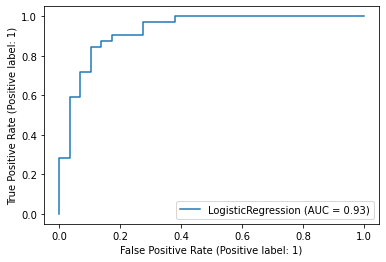

In [20]:
y_pred = rfc.predict(X_test)
eve(y_test,y_pred,rfc)

## THE ABOVE CLASSIFICATION REPORT IS PREPARED ONLY ON THE X_TEST DATASET, THAT IS ONLY 20% OF THE DATA. THIS IS NOT A GOOD REPRESENTATIVE OF THE ENTIRE DATASET. HENCE, WE WOULD PERFORM A CROSS VALIDATION ON THE DATASET, AND THEN FORM A CLASSIFICATION REPORT THAT IS THE AVERAGE OF ALL THE CROSS VALIDATIONS

## HYPERTUNING WITH `GridSearchCV`

In [21]:
g_grid = {"C" : np.logspace(-4,4,30),
         "solver" : ["liblinear"]}
gs_model1 = GridSearchCV(model1,
                        param_grid=g_grid,
                        verbose=2,
                        cv=5)
gs_model1.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [22]:
gs_model1.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [23]:
gs_model1.score(X_test,y_test)
gs_model1_y_pred = gs_model1.predict(X_test)

Accuracy  :  0.9016393442622951 %
Precision :  0.8823529411764706 %
Recall    :  0.9375 %
F1 Score  :  0.9090909090909091 %
ROC_AUC_Score :  0.8997844827586207

******************Classification Report*****************
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


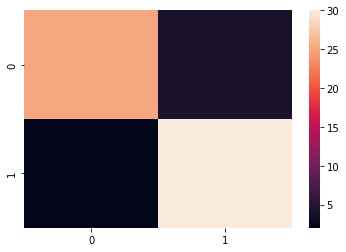

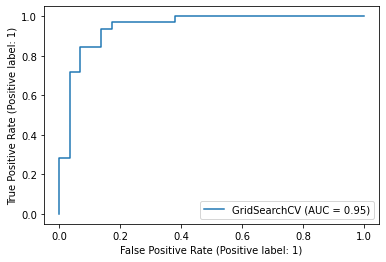

In [24]:
eve(y_test,gs_model1_y_pred,gs_model1)

## AS IT CAN BE SEEN , THE MODEL HAS IMPROVED 2%

In [25]:
gs_model1.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
tuned_model = LogisticRegression(C=0.20433597178569418,
                                solver='liblinear')
tuned_model.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [38]:
def metrics(tuned_model):
    tuned_model_ac_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="accuracy").mean()
    tuned_model_prec_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="precision").mean()
    tuned_model_rec_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="recall").mean()
    tuned_model_f1_sc = cross_val_score(tuned_model,X,y,cv=5,scoring="f1").mean()
    print("Accuracy Score :",tuned_model_ac_sc," \nPrecision Score :",tuned_model_prec_sc," \nRecall Score :",tuned_model_rec_sc,"\nF1 Score :",tuned_model_f1_sc)


In [39]:
metrics(model1)

Accuracy Score : 0.8284153005464482  
Precision Score : 0.810267949851881  
Recall Score : 0.8969696969696971 
F1 Score : 0.8505257643685707


In [40]:
metrics(tuned_model)

Accuracy Score : 0.8349726775956284  
Precision Score : 0.808353773231822  
Recall Score : 0.9151515151515153 
F1 Score : 0.8576321699851113


## AS CAN BE SEEN ABOVE, MODEL1 IS THE BASELINE MODEL, WHILE TUNED_MODEL IS REFINED LOGISTICS_REGRESSION MODEL.
## THE TUNED MODEL HAS A SLIGHTLY HIGHER ACCURACY THAN THE BASELINE PREDICTIONS

## `modelname.coef_` gives the importance percentage of each feature in the dataset

In [43]:
tuned_model.coef_

array([[ 0.01397254, -0.90027457,  0.62527718, -0.01836762, -0.00153459,
        -0.07074229,  0.24478568,  0.0256998 , -0.63565204, -0.41431783,
         0.4090121 , -0.58674883, -0.60001278]])

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


In [45]:
coef_list = tuned_model.coef_
feature_dict = dict(zip(data.columns,list(tuned_model.coef_[0])))
feature_dict

{'age': 0.013972543613858059,
 'sex': -0.9002745679611097,
 'cp': 0.625277181123985,
 'trestbps': -0.01836762328583035,
 'chol': -0.001534590285576476,
 'fbs': -0.07074229133107443,
 'restecg': 0.24478567609096183,
 'thalach': 0.025699800620813815,
 'exang': -0.6356520442057381,
 'oldpeak': -0.4143178322734015,
 'slope': 0.40901209616574313,
 'ca': -0.5867488272626795,
 'thal': -0.6000127750833569}

<AxesSubplot:title={'center':'Feature Importance '}>

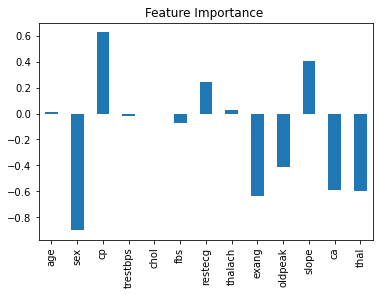

In [59]:
feature = pd.DataFrame(feature_dict,index=[0])
feature.T.plot.bar(title="Feature Importance ",legend=False)